In [6]:
from huggingface_hub import notebook_login
notebook_login()

In [7]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import string
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import unicodedata
import re
import torch
from tqdm import tqdm


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tkinter as tk
import networkx as nx
import textdistance
from sentence_transformers import SentenceTransformer, util
from datasets import load_dataset
from fuzzywuzzy import fuzz

from IPython.display import display, Image


from transformers import AutoTokenizer, AutoModel

from difflib import SequenceMatcher
import difflib

import warnings
# Filter out specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import fasttext.util
fasttext.util.download_model('fr', if_exists='ignore')

'cc.fr.300.bin'

## dummy text examples for experimentation

In [8]:
text_1 = """
L'albatros majestueux planait au-dessus des vagues écumeuses, ses ailes étendues captant les courants d'air.
Il parcourait des kilomètres sans effort, observant les poissons argentés scintiller sous la surface de l'océan.
Le soleil couchant teintait le ciel de nuances d'orange et de rose, créant un tableau époustouflant.

Le chat noir saute rapidement sur le toit.
Il regarde autour de lui et aperçoit une souris grise qui court sur le sol.
Le chat descend du toit avec agilité et commence à poursuivre la souris.
La souris tente de s'échapper en se faufilant dans un trou, mais le chat est trop rapide pour elle.
Finalement, le chat attrape la souris et retourne sur le toit pour savourer sa prise.
"""
text_2 = """
Le chat noir saute rapidement sur le toit.
Il regarde autour de lui et voit une souris grise qui court sur le sol.
Le chat descend du toit avec agilité et commence à poursuivre la souris.
La souris tente de s'échapper en se faufilant dans un trou, mais le chat est trop rapide pour elle.
Finalement, le chat attrape la souris et retourne sur le toit pour savourer sa proie.


Le chercheur entra dans le laboratoire, ses mains protégées par des gants de latex.
Devant lui, des tubes à essai alignés contenaient diverses solutions chimiques.
Concentré, il ajusta le microscope pour observer les réactions au niveau cellulaire,
cherchant des indices sur le développement des nouvelles molécules.
"""

In [9]:

text_3 = """
L'albatros majestueux planait au-dessus des vagues écumeuses, ses ailes étendues captant les courants d'air.
Il parcourait des kilomètres sans effort, observant les poissons argentés scintiller sous la surface de l'océan.
Le soleil couchant teintait le ciel de nuances d'orange et de rose, créant un tableau époustouflant.

Le médecin entra dans la salle d'examen, portant une blouse blanche immaculée.
Il salua le patient avec un sourire rassurant, puis prit son stéthoscope pour écouter les battements de son cœur.
Après un examen minutieux, il nota ses observations dans le dossier médical et prescrivit un traitement approprié, 
tout en expliquant clairement les prochaines étapes du soin.
"""
text_4 = """
La doctoresse pénétra dans le cabinet, habillée d'une tunique clinique impeccable.
Elle accueillit le malade avec une expression bienveillante, puis utilisa son instrument pour vérifier le rythme cardiaque.
Après une inspection détaillée, elle consigna ses notes dans le fichier du patient et recommanda une thérapie adaptée,
en détaillant soigneusement les procédures à suivre.

Le chat noir saute rapidement sur le toit.
Il regarde autour de lui et voit une souris grise qui court sur le sol.
Le chat descend du toit avec agilité et commence à poursuivre la souris.
La souris tente de s'échapper en se faufilant dans un trou, mais le chat est trop rapide pour elle.
Finalement, le chat attrape la souris et retourne sur le toit pour savourer sa proie.
"""
text_5 = """sovent que denier a Change, Rimer vueil du monde divers. Toz fu estez, or
est yvers; Bon fu, or est d'autre maniere, Quar nule gent n'est més maniere
De l'autrui porfit porchacier, Se son preu n'i cuide chacier. Chascuns
devient oisel de proie: Nul ne vit més se il ne proie. Por ce dirai l'estat du
monde, Qui de toz biens se vuide et monde. Relegieus premierement
Deussent vivre saintement, Ce croi, selonc m'entencion. Si a double
religion: Li un sont moine blanc et noir Qui maint biau lieu et maint manoir
Ont et mainte richece assise, Qui toz sont sers a Covoitise. Toz jors vuelent
sanz doner prendre, Toz jors achatent sanz riens vendre. Il tolent, l'en ne
lot tolt rien. Il sont fondé sus fort mesrien:
"""
text_6 = """veux rimer sur ce monde changeant. L'été est passé, maintenant c'est
l'hiver; le monde était bon, maintenant c'est différent, car personne ne sait
plus travailler au bien d'autrui, s'il ne pense pas y trouver son profit.
Chacun se fait oiseau de proie: nul ne vit plus que de proies. C'est pourquoi
je vais dire l'état où est ce monde, qui de tout bien se vide et s'émonde.
Tout d'abord, les religieux devraient vivre saintement: c'est mon avis. Or, ils
sont de deux sortes: les uns sont des moines blancs ou noirs , qui
possèdent maintes belles résidences et maintes richesses solides. Ils sont
tous esclaves de Cupidité. Sans cesse ils veulent prendre sans jamais
donner, sans cesse ils achètent sans jamais rien vendre. Ils prennent, et on ne leur prend
"""
text_7 = "sovent que denier a Change, Rimer vueil du monde divers. Toz fu estez, or est yvers; Bon fu, or est d'autre maniere, Quar nule gent n'est més maniere De l'autrui porfit porchacier, Se son preu n'i cuide chacier. Chascuns devient oisel de proie: Nul ne vit més se il ne proie. Por ce dirai l'estat du monde, Qui de toz biens se vuide et monde. Relegieus premierement Deussent vivre saintement, Ce croi, selonc m'entencion. Si a double religion: Li un sont moine blanc et noir Qui maint biau lieu et maint manoir Ont et mainte richece assise, Qui toz sont sers a Covoitise. Toz jors vuelent sanz doner prendre, Toz jors achatent sanz riens vendre. Il tolent, l'en ne lot tolt rien. Il sont fondé sus fort mesrien:"
text_8 = "veux rimer sur ce monde changeant. L'été est passé, maintenant c'est l'hiver; le monde était bon, maintenant c'est différent, car personne ne sait plus travailler au bien d'autrui, s'il ne pense pas y trouver son profit. Chacun se fait oiseau de proie: nul ne vit plus que de proies. C'est pourquoi je vais dire l'état où est ce monde, qui de tout bien se vide et s'émonde. Tout d'abord, les religieux devraient vivre saintement: c'est mon avis. Or, ils sont de deux sortes: les uns sont des moines blancs ou noirs , qui possèdent maintes belles résidences et maintes richesses solides. Ils sont tous esclaves de Cupidité. Sans cesse ils veulent prendre sans jamais donner, sans cesse ils achètent sans jamais rien vendre. Ils prennent, et on ne leur prend"

text_9 = "de voir: Bien le poiez aparsouvoir Par cestui qui en fu baniz. Et si ne fu mie feniz Li plaiz, ainz dura puis grant piece. Car la cours, qui fait et depiece, Nuit Guillaume de Saint Amour [Et] par priere et par cremour. Cil de court font bien ce qu'il font, Car il font ce qu'autre defont, Et si defont ce qu'autre fait: Ainsi n'auront il jamais fait. Explicit. Ci encoumence li dis des Jacobins I Signour, moult me merveil que ciz siecles devient Et de ceste merveille trop souvent me souvient, Si que en mervillant a force me"
text_10 = "lui qui fut pour cela banni. Et cela ne mit pas fin à la dispute : elle dura longtemps encore. Car la cour de Rome, qui construit et démolit, a fait du tort à Guillaume de Saint-Amour en cédant aux pressions et à la peur. Les gens de cette cour font bien ce qu'ils font, car ils font ce que les autres défont et ils défont ce qu'un autre a fait. Ainsi ils n'auront jamais fini. Le dit des Jacobins I Seigneurs, le monde va d'un train qui m'étonne beaucoup: cet étonnement me vient si souvent à l'esprit qu'à force d'être étonné, je ne puis"


In [10]:
# IGNORE - (Some parameters)
THRESHOLD = 0.8
MODULARITY = "greedy"
QUANTILE_THRESHOLD = 0.8

### from text to chunks

In [11]:
# using tokenizer to convert chunks to embeddings using transformers
def embed_chunks_transformers(sentences, tokenizer, model):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# using tokenizer to convert chunks to embeddings using fasttext
def embed_chunks_fasttext(chunks):
    
    ft = fasttext.load_model('cc.fr.300.bin')
    chunks_ft = [ft.get_sentence_vector(chunk) for chunk in chunks]
    
    return np.vstack(chunks_ft)

# normalizing text (basic)
def normalize_text(text):

    text = text.replace('\n', ' ')
    
    #text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    text = text.lower()

    return text

# convert text into list of sentences (chunks)
def break_into_chunks(text, split = 'sentences'):

    if split == 'sentences':
        sentences = [sentence.strip() for sentence in text.split('.')]
        sentences = [sentence for sentence in sentences if sentence]
        return sentences
    elif split == 'ngrams':
        n = 3
        words = text.split()
        chunks = [' '.join(words[i:i+n]) for i in range(0, len(words), n)]
        return chunks

input_1 = text_9
input_2 = text_10

#input_1 = normalize_text(input_1)
#input_2 = normalize_text(input_2)
    
SPLIT_CHUNKS = 'sentences'
chunks_1 = break_into_chunks(input_1, split = SPLIT_CHUNKS)
chunks_2 = break_into_chunks(input_2, split = SPLIT_CHUNKS)

### from chunks to embeddings

In [12]:
model_mini_lm = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
model_bert_base = "bert-base-multilingual-cased"
model_fasttext = "fasttext"
model_distiluse_base = "sentence-transformers/distiluse-base-multilingual-cased-v2"
MODEL_NAME = model_mini_lm

if MODEL_NAME == "fasttext":
    embeddings1 = embed_chunks_fasttext(chunks_1)
    embeddings2 = embed_chunks_fasttext(chunks_2)
elif MODEL_NAME == model_mini_lm:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModel.from_pretrained(MODEL_NAME)

    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model)
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model)
    
elif MODEL_NAME == model_bert_base:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModel.from_pretrained(MODEL_NAME)
    
    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model).numpy()
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model).numpy()
    
else:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModel.from_pretrained(MODEL_NAME)
    
    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model).numpy()
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model).numpy()

### calculating similarity + graph-based clustering

In [43]:
# makes a dataframe with sentences and their similarity score
def get_comp_sentences(sim_df, sentences1, sentences2, threshold = 0):
    result  =sim_df.stack()[sim_df.stack() > threshold]
    indices = [(idx[0], idx[1]) for idx in result.index]

    df_comp = pd.DataFrame(columns=['sent1', 'sent2', 'sim_score'])
    for row, col in indices:
        df_comp = df_comp.append([
            {'sent1': sentences1[row],
            'sent2': sentences2[col],
            'sim_score': sim_df.iloc[row][col]}
        ])
    df_comp = df_comp.sort_values(by='sim_score', ascending = False)
    return df_comp

# outputs graph for clustering of sentences
def return_graph(chunks_1, chunks_2, sim_matrix):
    
    G = nx.DiGraph()

    for i, chunk in enumerate(chunks_1):
        G.add_node(f'T1_{i}', text=chunk)
    for i, chunk in enumerate(chunks_2):
        G.add_node(f'T2_{i}', text=chunk)

    for i, chunk1 in enumerate(chunks_1):
        for j, chunk2 in enumerate(chunks_2):
            similarity_score = sim_matrix[i, j]
            if similarity_score > THRESHOLD:
                G.add_edge(f'T1_{i}', f'T2_{j}', weight=similarity_score)
                
    return G

# graph-based clustering algorithm (forming communities) depending on algorithm 
def make_communities_show_graph(chunks_1, chunks_2, sim_matrix, modularity = MODULARITY):
    G = return_graph(chunks_1, chunks_2, sim_matrix)
    communities = None
    try:
        if modularity == 'greedy':
            communities = nx.community.greedy_modularity_communities(G)
        elif modularity == 'newman':
            communities = nx.community.girvan_newman(G)
        elif modularity == 'best_partition':
            communities = nx.community.louvain_partitions(G)
        elif modularity == "lpa":
            communities = nx.community.asyn_lpa_communities(G)
        else:
            print("error communities")

        communities = list(communities)
        show_graph(G, communities)
        print_sentences_clusters(chunks_1, chunks_2, communities)
        measure_clustering_quality(G, communities)
        return communities

    except Exception as e:
        print("Pas de cluster")
        print(e)
        
# just showing the graph
def show_graph(G, communities):

    node_community_map = {}
    for idx, community_nodes in enumerate(communities):
        for node in community_nodes:
            node_community_map[node] = idx

    node_colors = [node_community_map[node] for node in G.nodes()]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab10, node_size=500)
    plt.title('Community Detection')
    plt.show()
    
    
# printing sentences associated for each communities 
def print_sentences_clusters(chunks_1, chunks_2, communities):

    node_to_sentence_idx = {}
    for i, chunk in enumerate(chunks_1):
        node_to_sentence_idx[f'T1_{i}'] = i
    for i, chunk in enumerate(chunks_2):
        node_to_sentence_idx[f'T2_{i}'] = len(chunks_1) + i  # Offset for sentences2

    dict_communities = {}
        
    for community_id, community_nodes in enumerate(communities):
        if len(community_nodes) > 1:
            print(f"\nCommunity {community_id+1}:")
            for node in community_nodes:
                sentence_idx = node_to_sentence_idx[node]
                if sentence_idx < len(chunks_1):
                    sentence = chunks_1[sentence_idx]
                    print(f"\t- T1_{sentence_idx}: {sentence}")
                else:
                    sentence_idx -= len(chunks_1)  # Adjust for offset
                    sentence = chunks_2[sentence_idx]
                    print(f"\t- T2_{sentence_idx}: {sentence}")
                    
# returning sentences associated for each communities 
def return_communities_sentences(chunks_1, chunks_2, communities):

    node_to_sentence_idx = {}
    for i, chunk in enumerate(chunks_1):
        node_to_sentence_idx[f'T1_{i}'] = i
    for i, chunk in enumerate(chunks_2):
        node_to_sentence_idx[f'T2_{i}'] = len(chunks_1) + i  # Offset for sentences2

    for community_id, community_nodes in enumerate(communities):
        if len(community_nodes) > 1:
            print(f"\nCommunity {community_id+1}:")
            for node in community_nodes:
                sentence_idx = node_to_sentence_idx[node]
                if sentence_idx < len(chunks_1):
                    sentence = chunks_1[sentence_idx]
                    print(f"\t- T1_{sentence_idx}: {sentence}")
                else:
                    sentence_idx -= len(chunks_1)  # Adjust for offset
                    sentence = chunks_2[sentence_idx]
                    print(f"\t- T2_{sentence_idx}: {sentence}")
           
        
# keeping only pairs of sentences with similarity > threshold
def get_comp_sentences(sim_df, sentences1, sentences2, threshold = THRESHOLD):
    result  =sim_df.stack()[sim_df.stack() > threshold]
    indices = [(idx[0], idx[1]) for idx in result.index]

    df_comp = pd.DataFrame(columns=['sent1', 'sent2', 'sim_score'])
    for row, col in indices:
        df_comp = df_comp.append([
            {'sent1': sentences1[row],
            'sent2': sentences2[col],
            'sim_score': sim_df.iloc[row][col]}
        ])
    df_comp = df_comp.sort_values(by='sim_score', ascending = False)
    return df_comp

# converting distance to similarity score
def dist_to_sim(matrix):
    return 1/(1+matrix)
    

# normalizing matrix
def normalize_matrix(matrix):
    scaler = MinMaxScaler()
    scaled_matrix = scaler.fit_transform(matrix)
    return scaled_matrix


def get_fuzzy_df_comp(threshold = 0.8):
    
    # Function to find similar sentences using FuzzyWuzzy
    def find_similar_sentences(query, sentences, threshold = threshold):
        results = []
        for sentence in sentences:
            similarity = fuzz.token_sort_ratio(query, sentence)
            if similarity >= threshold:
                results.append((sentence, similarity))
        results.sort(key=lambda x: x[1], reverse=True)
        return results

    # Finding similar sentences
    similar_sentences = find_similar_sentences(query, sentences, threshold = THRESHOLD)


    matrix = np.zeros((len(chunks_1), len(chunks_2)))
    for i,sent_1 in enumerate(chunks_1):
        for j, sent_2 in enumerate(chunks_2):
            sim = fuzz.ratio(sent_1, sent_2)
            matrix[i,j] = sim
            
    sim_df = pd.DataFrame(matrix/100)
    df_comp = get_comp_sentences(sim_df, chunks_1, chunks_2, threshold = threshold)
    
    return df_comp


# keeping sentences with sim score above certain quantile
def get_top_comp(df_comp, quantile = QUANTILE_THRESHOLD):
    val_quantile = df_comp['sim_score'].quantile(quantile)
    df_comp_top = df_comp[df_comp['sim_score'] >= val_quantile]
    return df_comp_top


# removing duplicates in comparison dataframe
def filter_df_comp_top(df):
    result = df.sort_values(by = ['sent1', 'sim_score'], ascending=[True, False])
    result = result.drop_duplicates(subset='sent1', keep='first')
    
    result = result.sort_values(by = ['sent2', 'sim_score'], ascending=[True, False])
    result = result.drop_duplicates(subset='sent2', keep='first')
    
    
    result = result.sort_values(by = ['sim_score'], ascending = False)
    return result

# find indices of a substring in main string
def find_substring_indices(main_string, substring):
    start_index = main_string.find(substring)
    end_index = start_index + len(substring)
    return start_index, end_index

# get indices for highlighting purposes in interface
def get_indices(df_comp, input_1, input_2):
    
    def find_substring_indices(main_string, substring):
        start_index = main_string.find(substring)
        end_index = start_index + len(substring)
        return start_index, end_index
    
    nb_lines = df_comp.shape[0]
    
    highlight_ranges_text1 = []
    highlight_ranges_text2 = []
    sent_list_1 = []
    sent_list_2 = []
    
    for i in range(nb_lines):
        sent1 = df_comp['sent1'].values[i]
        sent2 = df_comp['sent2'].values[i]
        
        tuple1 = find_substring_indices(input_1, sent1)
        tuple2 = find_substring_indices(input_2, sent2)
        
        highlight_ranges_text1.append(tuple1)
        highlight_ranges_text2.append(tuple2)
        
        sent_list_1.append(sent1)
        sent_list_2.append(sent2)
        
    return nb_lines, highlight_ranges_text1, highlight_ranges_text2, sent_list_1, sent_list_2

## "method"
- calculate similarity metric
- keep top sentences in similarity 
- showing graph-based clustering

## Semantically

### cosine sim

In [14]:
sim_matrix_cos = np.array(util.pytorch_cos_sim(embeddings1, embeddings2))
sim_df_cos = pd.DataFrame(sim_matrix_cos)
df_comp_cos = get_comp_sentences(sim_df_cos, chunks_1, chunks_2)

df_comp_top_cos = get_top_comp(df_comp_cos)
df_top_filt_cos = filter_df_comp_top(df_comp_top_cos)

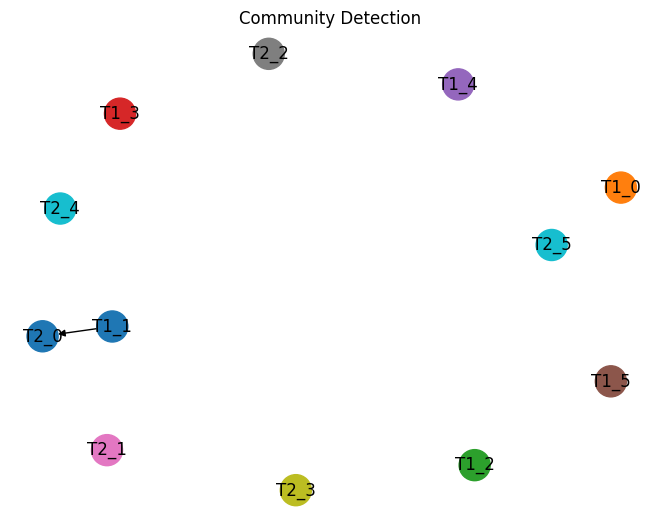


Community 1:
	- T2_0: lui qui fut pour cela banni
	- T1_1: Et si ne fu mie feniz Li plaiz, ainz dura puis grant piece
Pas de cluster
name 'measure_clustering_quality' is not defined


In [15]:
communities_cos = make_communities_show_graph(chunks_1, chunks_2, sim_matrix_cos)

### euclidean distance

In [16]:
dist_matrix_euclid = pairwise_distances(embeddings1, embeddings2,
                                               metric = 'euclidean')
sim_matrix_euclid = dist_to_sim(dist_matrix_euclid)
sim_df_euclid = pd.DataFrame(sim_matrix_euclid)
df_comp_euclid = get_comp_sentences(sim_df_euclid, chunks_1, chunks_2)

df_comp_top_euclid = get_top_comp(df_comp_euclid)
df_top_filt_euclid = filter_df_comp_top(df_comp_top_euclid)

In [17]:
make_communities_show_graph(chunks_1, chunks_2, sim_matrix_euclid)

Pas de cluster
division by zero


### Dot product

In [18]:
num_embeddings1 = embeddings1.shape[0]
num_embeddings2 = embeddings2.shape[0]

inner_product_matrix = np.zeros((num_embeddings1, num_embeddings2))

# Calculate inner product for each pair of embeddings using nested loops
for i in range(num_embeddings1):
    for j in range(num_embeddings2):
        inner_product_matrix[i, j] = np.dot(embeddings1[i], embeddings2[j])
        
inner_product_matrix = normalize_matrix(inner_product_matrix)

In [19]:
sim_df_inner = pd.DataFrame(inner_product_matrix)
df_comp_inner = get_comp_sentences(sim_df_inner, chunks_1, chunks_2)

df_comp_top_in = get_top_comp(df_comp_inner)
df_top_filt_inner = filter_df_comp_top(df_comp_top_in)

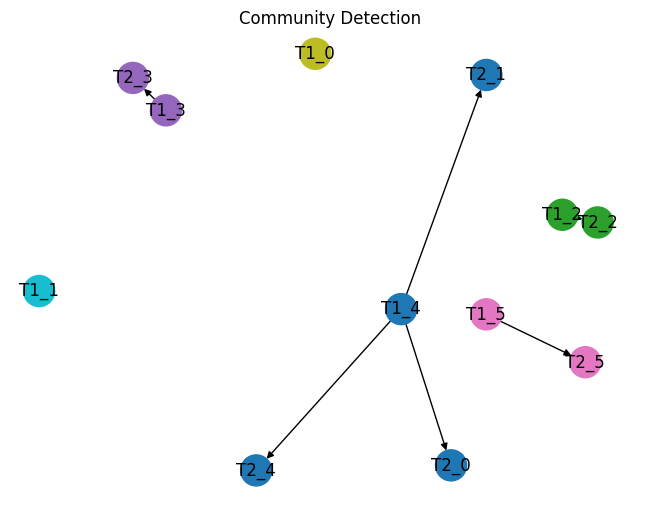


Community 1:
	- T1_4: Explicit
	- T2_0: lui qui fut pour cela banni
	- T2_1: Et cela ne mit pas fin à la dispute : elle dura longtemps encore
	- T2_4: Ainsi ils n'auront jamais fini

Community 2:
	- T2_2: Car la cour de Rome, qui construit et démolit, a fait du tort à Guillaume de Saint-Amour en cédant aux pressions et à la peur
	- T1_2: Car la cours, qui fait et depiece, Nuit Guillaume de Saint Amour [Et] par priere et par cremour

Community 3:
	- T2_3: Les gens de cette cour font bien ce qu'ils font, car ils font ce que les autres défont et ils défont ce qu'un autre a fait
	- T1_3: Cil de court font bien ce qu'il font, Car il font ce qu'autre defont, Et si defont ce qu'autre fait: Ainsi n'auront il jamais fait

Community 4:
	- T1_5: Ci encoumence li dis des Jacobins I Signour, moult me merveil que ciz siecles devient Et de ceste merveille trop souvent me souvient, Si que en mervillant a force me
	- T2_5: Le dit des Jacobins I Seigneurs, le monde va d'un train qui m'étonne beaucoup: 

In [20]:
make_communities_show_graph(chunks_1, chunks_2, inner_product_matrix)

## Lexically


### Jaccard similarity

In [21]:
import numpy as np

def jaccard_similarity_matrix(sentences1, sentences2):
    words1 = [set(sentence.lower().split()) for sentence in sentences1]
    words2 = [set(sentence.lower().split()) for sentence in sentences2]
    
    words1_array = np.array(words1)
    words2_array = np.array(words2)
    
    intersection_matrix = np.array([len(words1_array[i].intersection(words2_array[j])) for i in range(len(words1_array)) for j in range(len(words2_array))]).reshape(len(words1_array), len(words2_array))
    union_matrix = np.array([len(words1_array[i].union(words2_array[j])) for i in range(len(words1_array)) for j in range(len(words2_array))]).reshape(len(words1_array), len(words2_array))
    
    similarity_matrix = intersection_matrix / union_matrix
    
    return similarity_matrix

sim_matrix_jaccard = jaccard_similarity_matrix(chunks_1, chunks_2)

sim_df_jaccard = pd.DataFrame(sim_matrix_jaccard)
df_comp_jaccard = get_comp_sentences(sim_df_jaccard, chunks_1, chunks_2)

df_comp_top_jaccard = get_top_comp(df_comp_jaccard)
df_top_filt_jaccard = filter_df_comp_top(df_comp_top_jaccard)



In [22]:
make_communities_show_graph(chunks_1, chunks_2, sim_matrix_jaccard)

Pas de cluster
division by zero


### Levenshtein distance

In [23]:
from Levenshtein import distance
def levenshtein_matrix(list1, list2):
    distance_matrix = []
    for sentence1 in list1:
        row = []
        for sentence2 in list2:
            lev_distance = 1/(1+distance(sentence1, sentence2))
            row.append(lev_distance)
        distance_matrix.append(row)
    return distance_matrix

In [24]:
# Calculate and print the distance matrix
dist_matrix_lev = np.array(levenshtein_matrix(chunks_1, chunks_2))
df_matrix_lev = pd.DataFrame(dist_matrix_lev)
df_comp_lev = get_comp_sentences(df_matrix_lev, chunks_1, chunks_2)

df_comp_top_lev = get_top_comp(df_comp_lev)
df_top_filt_lev = filter_df_comp_top(df_comp_top_lev)

In [25]:
df_top_filt_lev

,sent1,sent2,sim_score


In [26]:
make_communities_show_graph(chunks_1, chunks_2, sim_matrix_jaccard)

Pas de cluster
division by zero


### Hamming distance

In [27]:
def hamming_normalized_distance(list1, list2):
    distance_matrix = []
    for sentence1 in list1:
        row = []
        for sentence2 in list2:
            lev_distance = textdistance.hamming.normalized_similarity(sentence1, sentence2)
            row.append(lev_distance)
        distance_matrix.append(row)
    return distance_matrix

In [28]:

hamming_matrix = np.array(hamming_normalized_distance(chunks_1, chunks_2))
hamming_matrix_df = pd.DataFrame(hamming_matrix)
df_comp_hamming = get_comp_sentences(hamming_matrix_df, chunks_1, chunks_2)

df_comp_top_hamming = get_top_comp(df_comp_hamming)
df_top_filt_hamming = filter_df_comp_top(df_comp_top_hamming)


In [29]:
df_top_filt_hamming

,sent1,sent2,sim_score


In [30]:
make_communities_show_graph(chunks_1, chunks_2, hamming_matrix)

Pas de cluster
division by zero


### Jaro winkler

In [31]:
def jaro_winkler_matrix(list1, list2):
    similarity_matrix = []
    for sentence1 in list1:
        row = []
        for sentence2 in list2:
            similarity = textdistance.jaro_winkler.similarity(sentence1, sentence2)
            row.append(similarity)
        similarity_matrix.append(row)
    return similarity_matrix

In [32]:
jw_matrix = np.array(jaro_winkler_matrix(chunks_1, chunks_2))
jw_matrix_df = pd.DataFrame(jw_matrix)
df_comp_jw = get_comp_sentences(jw_matrix_df, chunks_1, chunks_2)

df_comp_top_jw = get_top_comp(df_comp_jw)
df_top_filt_jw = filter_df_comp_top(df_comp_top_jw)

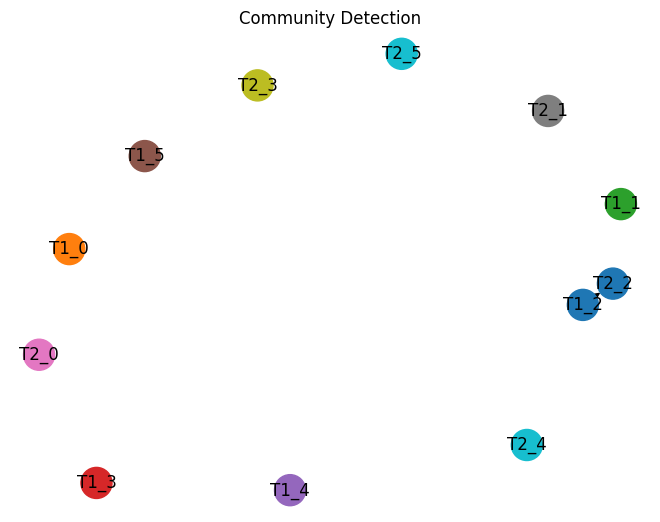


Community 1:
	- T2_2: Car la cour de Rome, qui construit et démolit, a fait du tort à Guillaume de Saint-Amour en cédant aux pressions et à la peur
	- T1_2: Car la cours, qui fait et depiece, Nuit Guillaume de Saint Amour [Et] par priere et par cremour
Pas de cluster
name 'measure_clustering_quality' is not defined


In [33]:
make_communities_show_graph(chunks_1, chunks_2, jw_matrix)

## Hybrid approach

### weigthed average

In [34]:
# affine combination between semantic similarity and lexical similarity (coefficients between 0 and 1)
lex_coef = 0.2
sem_coef = 1 - lex_coef
sim_matrix_weighted = lex_coef*dist_matrix_lev + lex_coef*sim_matrix_cos


sim_df_inner_weighted = pd.DataFrame(sim_matrix_weighted)
df_comp_inner_weighted = get_comp_sentences(sim_df_inner_weighted, chunks_1, chunks_2)

df_comp_top_inner_weighted = get_top_comp(df_comp_inner_weighted)
df_top_filt_inner_weighted = filter_df_comp_top(df_comp_top_inner_weighted)

In [35]:
make_communities_show_graph(chunks_1, chunks_2, sim_matrix_weighted)

Pas de cluster
division by zero


### point-wise multiplication

In [36]:
sim_matrix_pw = np.multiply(sim_matrix_cos, dist_matrix_lev)
make_communities_show_graph(chunks_1, chunks_2, sim_matrix_pw)

Pas de cluster
division by zero


# Evaluation

### comparing embeddings

### get similarity matrix

## Evaluation of semantic methods for different embeddings

In [215]:
"""
df = load_dataset("PhilipMay/stsb_multi_mt", "fr")
df = df['train'].to_pandas()
df['sentence1'] = df['sentence1'].apply(normalize_text)
df['sentence2'] = df['sentence2'].apply(normalize_text)
df['similarity_score'] = df['similarity_score']/5
"""

'\ndf = load_dataset("PhilipMay/stsb_multi_mt", "fr")\ndf = df[\'train\'].to_pandas()\ndf[\'sentence1\'] = df[\'sentence1\'].apply(normalize_text)\ndf[\'sentence2\'] = df[\'sentence2\'].apply(normalize_text)\ndf[\'similarity_score\'] = df[\'similarity_score\']/5\n'

In [216]:
# general fucntion to predict 
def predict_sim_score_cos(df):
    sent_1 = df['sentence1']
    sent_2 = df['sentence2']
    
    SPLIT_CHUNKS = 'sentences'
    chunks_1 = break_into_chunks(sent_1, split = SPLIT_CHUNKS)
    chunks_2 = break_into_chunks(sent_2, split = SPLIT_CHUNKS)
    
    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model)
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model)
    
    sim_matrix_cos = np.array(util.pytorch_cos_sim(embeddings1, embeddings2))
    pred_sim_score = sim_matrix_cos[0,0]
    return pred_sim_score

def predict_sim_score_euclid(df):
    
    sent_1 = df['sentence1']
    sent_2 = df['sentence2']
    
    SPLIT_CHUNKS = 'sentences'
    chunks_1 = break_into_chunks(sent_1, split = SPLIT_CHUNKS)
    chunks_2 = break_into_chunks(sent_2, split = SPLIT_CHUNKS)
    
    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model)
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model)
    
    dist_matrix_euclid = pairwise_distances(embeddings1, embeddings2,
                                               metric = 'euclidean')
    sim_matrix_euclid = dist_to_sim(dist_matrix_euclid)
    return sim_matrix_euclid[0,0]

def predict_sim_score_dot(df):
    
    sent_1 = df['sentence1']
    sent_2 = df['sentence2']
    
    SPLIT_CHUNKS = 'sentences'
    chunks_1 = break_into_chunks(sent_1, split = SPLIT_CHUNKS)
    chunks_2 = break_into_chunks(sent_2, split = SPLIT_CHUNKS)
    
    embeddings1 = embed_chunks_transformers(chunks_1, tokenizer, model)
    embeddings2 = embed_chunks_transformers(chunks_2, tokenizer, model)
    
    num_embeddings1 = embeddings1.shape[0]
    num_embeddings2 = embeddings2.shape[0]

    inner_product_matrix = np.zeros((num_embeddings1, num_embeddings2))

    # Calculate inner product for each pair of embeddings using nested loops
    for i in range(num_embeddings1):
        for j in range(num_embeddings2):
            inner_product_matrix[i, j] = np.dot(embeddings1[i], embeddings2[j])

    return inner_product_matrix[0, 0]

In [217]:
def predict_sim_score_cos_fasttext(df):
    
    sent_1 = df['sentence1']
    sent_2 = df['sentence2']
    
    SPLIT_CHUNKS = 'sentences'
    chunks_1 = break_into_chunks(sent_1, split = SPLIT_CHUNKS)
    chunks_2 = break_into_chunks(sent_2, split = SPLIT_CHUNKS)
    
    embeddings1 = embed_chunks_fasttext(chunks_1)
    embeddings2 = embed_chunks_fasttext(chunks_2)
    
    sim_matrix_cos = np.array(util.pytorch_cos_sim(embeddings1, embeddings2))
    pred_sim_score = sim_matrix_cos[0,0]
    return pred_sim_score

In [218]:
def print_eval_metric2(df):
    
    metrics = ['mae', 'mse']
    methods = ['pred_sim_score_cos', 'pred_sim_score_euclid', 'pred_sim_score_dot']
    
    matrix = np.zeros((3, 2))
    for i in range(len(methods)):
        for j in range(len(metrics)):
            if metrics[j] == "mse":
                val = round(mean_squared_error(df['similarity_score'], df[methods[i]]), 3)
            elif metrics[j] == "mae":
                val = round(mean_absolute_error(df['similarity_score'], df[methods[i]]), 3)
                
            matrix[i, j] = val
            
    methods_renamed = ['cos', 'euclid', 'dot']
    df = pd.DataFrame(matrix, columns = metrics,
                     index = methods_renamed)
    
    return df

In [37]:
# Created by Cer et al. at 2017, the Semantic Textual Similarity Benchmark

In [38]:
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

### miniLM

In [61]:
# making eval metrics dataframe
def print_eval_metric2(df):
    
    mae_cos = mean_absolute_error(df['similarity_score'], df['pred_sim_score_cos'])
    mse_cos = mean_squared_error(df['similarity_score'], df['pred_sim_score_cos'])
    
    mae_euclid = mean_absolute_error(df['similarity_score'], df['pred_sim_score_euclid'])
    mse_euclid = mean_squared_error(df['similarity_score'], df['pred_sim_score_euclid'])
    
    mae_dot = mean_absolute_error(df['similarity_score'], df['pred_sim_score_dot'])
    mse_dot = mean_squared_error(df['similarity_score'], df['pred_sim_score_dot'])
    
    data = [[mae_cos, mse_cos], 
        [mae_euclid, mse_euclid], 
        [mae_dot, mse_dot]]

    # Define column names
    columns = ['mae', 'mse']

    # Define index with strings
    index = ['cos', 'euclid', 'dot']

    # Create DataFrame
    df = pd.DataFrame(data, columns=columns, index=index)
    return df

#  highlighting lowest error in bold
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

In [62]:
df_minilm = pd.read_csv('df_minilm.csv')
df_minilm = pd.DataFrame(print_eval_metric2(df_minilm))
df_minilm = df_minilm.style.apply(highlight_min)
df_minilm

,mae,mse
cos,0.186765,0.056968
euclid,0.288078,0.116231
dot,0.242974,0.088855


### Bert

In [66]:
df_bert = pd.read_csv('df_bert.csv')
df_bert = pd.DataFrame(print_eval_metric2(df_bert))
df_bert = df_bert.style.apply(highlight_min)
df_bert

,mae,mse
cos,0.286302,0.128442
euclid,0.411988,0.232440
dot,0.272303,0.102517


### Distiluse-bert

In [67]:
df_distil_bert = pd.read_csv('df_distiluse-bert.csv')
df_distil_bert = pd.DataFrame(print_eval_metric2(df_distil_bert))
df_distil_bert = df_distil_bert.style.apply(highlight_min)
df_distil_bert

,mae,mse
cos,0.210753,0.070774
euclid,0.214131,0.061374
dot,0.250254,0.092396


## Getting the df for sentences with sim score for  each method

In [73]:
input_1 = text_9
input_2 = text_10

NORMALIZE = True
if NORMALIZE:
    input_1 = normalize_text(input_1)
    input_2 = normalize_text(input_2)
    
SPLIT_CHUNKS = 'sentences'
chunks_1 = break_into_chunks(input_1, split = SPLIT_CHUNKS)
chunks_2 = break_into_chunks(input_2, split = SPLIT_CHUNKS)

In [74]:
sim_matrix_jaccard = jaccard_similarity_matrix(chunks_1, chunks_2)
sim_df_jaccard = pd.DataFrame(sim_matrix_jaccard)
df_comp_jaccard = get_comp_sentences(sim_df_jaccard, chunks_1, chunks_2, threshold = 0)

In [75]:
df_comp_top_jaccard = get_top_comp(df_comp_jaccard)
df_top_filt_jaccard = filter_df_comp_top(df_comp_top_jaccard)

### levenshtein

In [76]:
dist_matrix_lev = np.array(levenshtein_matrix(chunks_1, chunks_2))
df_matrix_lev = pd.DataFrame(dist_matrix_lev)
df_comp_lev = get_comp_sentences(df_matrix_lev, chunks_1, chunks_2, threshold = 0)

df_comp_top_lev = get_top_comp(df_comp_lev)
df_top_filt_lev = filter_df_comp_top(df_comp_top_lev)

### Hamming

In [77]:
hamming_matrix = np.array(hamming_normalized_distance(chunks_1, chunks_2))
hamming_matrix_df = pd.DataFrame(hamming_matrix)
df_comp_hamming = get_comp_sentences(hamming_matrix_df, chunks_1, chunks_2, threshold = 0)

df_comp_top_hamming = get_top_comp(df_comp_hamming)
df_top_filt_hamming = filter_df_comp_top(df_comp_top_hamming)

In [78]:
text_7 = "sovent que denier a Change, Rimer vueil du monde divers. Toz fu estez, or est yvers; Bon fu, or est d'autre maniere, Quar nule gent n'est més maniere De l'autrui porfit porchacier, Se son preu n'i cuide chacier. Chascuns devient oisel de proie: Nul ne vit més se il ne proie. Por ce dirai l'estat du monde, Qui de toz biens se vuide et monde. Relegieus premierement Deussent vivre saintement, Ce croi, selonc m'entencion. Si a double religion: Li un sont moine blanc et noir Qui maint biau lieu et maint manoir Ont et mainte richece assise, Qui toz sont sers a Covoitise. Toz jors vuelent sanz doner prendre, Toz jors achatent sanz riens vendre. Il tolent, l'en ne lot tolt rien. Il sont fondé sus fort mesrien:"
text_8 = "veux rimer sur ce monde changeant. L'été est passé, maintenant c'est l'hiver; le monde était bon, maintenant c'est différent, car personne ne sait plus travailler au bien d'autrui, s'il ne pense pas y trouver son profit. Chacun se fait oiseau de proie: nul ne vit plus que de proies. C'est pourquoi je vais dire l'état où est ce monde, qui de tout bien se vide et s'émonde. Tout d'abord, les religieux devraient vivre saintement: c'est mon avis. Or, ils sont de deux sortes: les uns sont des moines blancs ou noirs , qui possèdent maintes belles résidences et maintes richesses solides. Ils sont tous esclaves de Cupidité. Sans cesse ils veulent prendre sans jamais donner, sans cesse ils achètent sans jamais rien vendre. Ils prennent, et on ne leur prend"

color_list3 = [
    "red", "blue", "green", "brown",  'orange', 'violet', 'grey'
]
color_list2 = [
    # Basic colors
    "red", "green", "blue", "black", "gray",

    # Lighter variations
    "lightcoral", "'lightgreen'", "lightskyblue", "lightgray",

    # Darker variations
    "darkred", "darkgreen", "darkblue", "darkgray",

    # Other colors
    "orange", "yellow", "purple", "pink", "cyan", "magenta", "teal", "maroon",
    "navy", "olive", "lime", "fuchsia", "aqua", "coral", "turquoise", "khaki",

    # Color names with better readability
    "goldenrod", "darkgoldenrod", "royalblue", "cadetblue", "darkslateblue",
    "mediumpurple", "darkorchid", "lightseagreen", "darkseagreen", "forestgreen",
    "peru", "sienna", "darkorange", "coralred", "tomato", "salmon",
]
color_list = ["red", "blue", "green", "brown",  'orange', 'violet', 'grey',
              "lightcoral", 'lightgreen', 'navy']

In [79]:
# !! insert the desired df according to metric
DF_COMP_TOP = df_top_filt_jaccard

## Interface

In [80]:
import difflib
from termcolor import colored

def color_diff(text1, text2):
    diff = difflib.ndiff(text1.split(), text2.split())
    result = []

    for word in diff:
        if word.startswith('-'):
            result.append(colored(word[2:], 'red'))
        elif word.startswith('+'):
            result.append(colored(word[2:], 'green'))
        else:
            result.append(word[2:])
    
    return ' '.join(result)

In [81]:
def highlight_differences(text1, text2, widget1, widget2):
    diff = difflib.ndiff(text1.split(), text2.split())
    for tag in widget1.tag_names():
        widget1.tag_delete(tag)
    for tag in widget2.tag_names():
        widget2.tag_delete(tag)

    widget1.tag_configure("inserted", background="lightgreen")
    widget2.tag_configure("deleted", background="lightblue")

    widget1_text = ""
    widget2_text = ""
    for i, s in enumerate(diff):
        if s.startswith("- "):
            widget1_text += s[2:] + " "
            widget1.insert(tk.END, s[2:] + " ", "deleted")
        elif s.startswith("+ "):
            widget2_text += s[2:] + " "
            widget2.insert(tk.END, s[2:] + " ", "inserted")
        elif s.startswith("? "):
            pass
        else:
            widget1_text += s[2:] + " "
            widget2_text += s[2:] + " "
            widget1.insert(tk.END, s[2:] + " ")
            widget2.insert(tk.END, s[2:] + " ")

In [82]:
DF_COMP_TOP

,sent1,sent2,sim_score
0,"cil de court font bien ce qu'il font, car il f...",les gens de cette cour font bien ce qu'ils fon...,0.250000
0,"car la cours, qui fait et depiece, nuit guilla...","car la cour de rome, qui construit et démolit,...",0.233333
0,"ci encoumence li dis des jacobins i signour, m...","le dit des jacobins i seigneurs, le monde va d...",0.145833
0,"et si ne fu mie feniz li plaiz, ainz dura puis...",et cela ne mit pas fin à la dispute : elle dur...,0.125000


# Interface with tkinter (images examples in images/ folder)

In [83]:
import tkinter as tk
from tkinter import ttk

def difflib_func():
    # Get current contents of text widgets
    current_text1 = text1.get("1.0", tk.END).strip()
    current_text2 = text2.get("1.0", tk.END).strip()

    # Highlight differences
    highlight_differences(current_text1, current_text2, text1, text2)

def get_line_indices(text):
 
    lines = text.splitlines(keepends=True)  # Keep newline characters
    line_indices = []
    current_index = 0
    for line_number, line in enumerate(lines, 1):
        line_length = len(line)
        end_index = current_index + line_length
        line_indices.append((line_number, current_index, end_index))
        current_index = end_index
    return line_indices

def highlight_text():
    
    nb_lines, highlight_ranges_text1, highlight_ranges_text2, sent_list_1, sent_list_2 = get_indices(DF_COMP_TOP, input_1, input_2)
    
    #print("len pairs:", len(highlight_ranges_text1))
    #print(highlight_ranges_text1)
        
    for i in range(nb_lines):    
        text1.tag_remove(f"highlighted{i}", f"{i}.0", "end")
        text2.tag_remove(f"highlighted{i}", f"{i}.0", "end")

 
    # Add highlight to text1
    for i, (start_i, end_i) in enumerate(highlight_ranges_text1):
        #line_i = start_i//100-1
        #if line_i < 0:
        #    line_i = 1
        start_line = start_i%100
        end_line = end_i%100
        
        
        #print(sent_list_1[i])
        print()
        
        text1.tag_configure(f"highlighted{i}", background=color_list[i])
        for line in range(10):
            text1.tag_add(f"highlighted{i}", f"{line}.{start_i}", f"{line}.{end_i}")
    
    print()
    # Add highlight to text2
    for j, (start_j, end_j) in enumerate(highlight_ranges_text2):
        #line_j = start_j//100-1
        #if line_j < 0:
        #    line_j = 1
        start_line = start_j%100
        end_line = end_j%100
        
        text2.tag_configure(f"highlighted{j}", background=color_list[j])
        for line in range(10):
            text2.tag_add(f"highlighted{j}", f"{line}.{start_j}", f"{line}.{end_j}")

def quit_app():
    root.destroy()  # Properly quit the tkinter application

# Create main application window
root = tk.Tk()
root.title("Highlight Text")


# Create a frame for the text widgets
frame = ttk.Frame(root)
frame.pack(padx=10, pady=10)

# Text widget for text 1
text1 = tk.Text(frame, height=40, width=100)
text1.insert(tk.END, text_9)
text1.pack(side=tk.LEFT, padx=5)

# Text widget for text 2
text2 = tk.Text(frame, height=40, width=100)
text2.insert(tk.END, text_10)
text2.pack(side=tk.RIGHT, padx=5)

# Create a button to highlight text
highlight_button = ttk.Button(root, text="highlight_text", command=highlight_text)
highlight_button.pack(pady=10)

difflib_button = ttk.Button(root, text="Difflib", command=difflib_func)
difflib_button.pack(pady=10)

# Create a button to quit the application
quit_button = ttk.Button(root, text="Quit", command=quit_app)
quit_button.pack(pady=10)

# Start the tkinter main loop
root.mainloop()

## Exact difference example

In [84]:
nb_lines, highlight_ranges_text1, highlight_ranges_text2, sent_list_1, sent_list_2 = get_indices(DF_COMP_TOP, input_1, input_2)
sentence_test_1 = sent_list_1[0]
sentence_test_2 = sent_list_2[0]

In [100]:
import tkinter as tk
from tkinter import ttk

def difflib_func():
    
    current_text1 = text1.get("1.0", tk.END).strip()
    current_text2 = text2.get("1.0", tk.END).strip()
    
    diff = difflib.ndiff(current_text1.split(), current_text2.split())
    text1.tag_configure("deleted", foreground="red")
    text1.tag_configure("added", foreground="green")
    
    text2.tag_configure("deleted", foreground="red")
    text2.tag_configure("added", foreground="green")
    
    text1.delete("1.0", tk.END)
    text2.delete("1.0", tk.END)

    for word in diff:
        if word.startswith('-'):
            text1.insert(tk.END, word[2:] + " ", "deleted")
        elif word.startswith('+'):
            text2.insert(tk.END, word[2:] + " ", "added")
        else:
            text1.insert(tk.END, word[2:] + " ")
            text2.insert(tk.END, word[2:] + " ")
       
        

def get_line_indices(text):
 
    lines = text.splitlines(keepends=True)  # Keep newline characters
    line_indices = []
    current_index = 0
    for line_number, line in enumerate(lines, 1):
        line_length = len(line)
        end_index = current_index + line_length
        line_indices.append((line_number, current_index, end_index))
        current_index = end_index
    return line_indices

def highlight_text():
    
    nb_lines, highlight_ranges_text1, highlight_ranges_text2, sent_list_1, sent_list_2 = get_indices(DF_COMP_TOP, input_1, input_2)

    #print("len pairs:", len(highlight_ranges_text1))
    #print(highlight_ranges_text1)
        
    for i in range(nb_lines):    
        text1.tag_remove(f"highlighted{i}", f"{i}.0", "end")
        text2.tag_remove(f"highlighted{i}", f"{i}.0", "end")

 
    # Add highlight to text1
    for i, (start_i, end_i) in enumerate(highlight_ranges_text1):
        #line_i = start_i//100-1
        #if line_i < 0:
        #    line_i = 1
        start_line = start_i%100
        end_line = end_i%100        
        
        #print(sent_list_1[i])
        print()
        
        text1.tag_configure(f"highlighted{i}", background=color_list[i])
        for line in range(10):
            text1.tag_add(f"highlighted{i}", f"{line}.{start_i}", f"{line}.{end_i}")
    
    print()
    # Add highlight to text2
    for j, (start_j, end_j) in enumerate(highlight_ranges_text2):
        #line_j = start_j//100-1
        #if line_j < 0:
        #    line_j = 1
        start_line = start_j%100
        end_line = end_j%100
        
        text2.tag_configure(f"highlighted{j}", background=color_list[j])
        for line in range(10):
            text2.tag_add(f"highlighted{j}", f"{line}.{start_j}", f"{line}.{end_j}")

def quit_app():
    root.destroy()  # Properly quit the tkinter application

# Create main application window
root = tk.Tk()
root.title("Highlight Text")

# Create a frame for the text widgets
frame = ttk.Frame(root)
frame.pack(padx=10, pady=10)

# Text widget for text 1
text1 = tk.Text(frame, height=40, width=100)
text1.insert(tk.END, sentence_test_1)
text1.pack(side=tk.LEFT, padx=5)

# Text widget for text 2
text2 = tk.Text(frame, height=40, width=100)
text2.insert(tk.END, sentence_test_2)
text2.pack(side=tk.RIGHT, padx=5)

# Create a button to highlight text
highlight_button = ttk.Button(root, text="highlight_text", command=highlight_text)
highlight_button.pack(pady=10)

difflib_button = ttk.Button(root, text="Difflib", command=difflib_func)
difflib_button.pack(pady=10)

# Create a button to quit the application
quit_button = ttk.Button(root, text="Quit", command=quit_app)
quit_button.pack(pady=10)

# Start the tkinter main loop
root.mainloop()